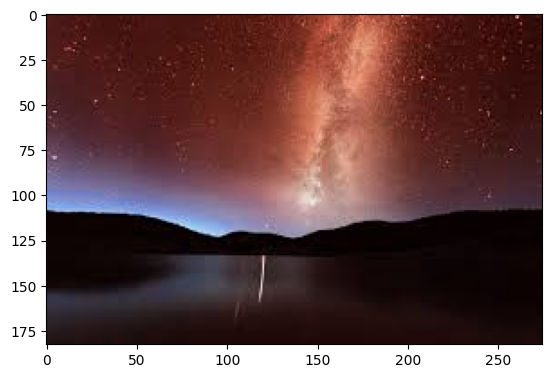

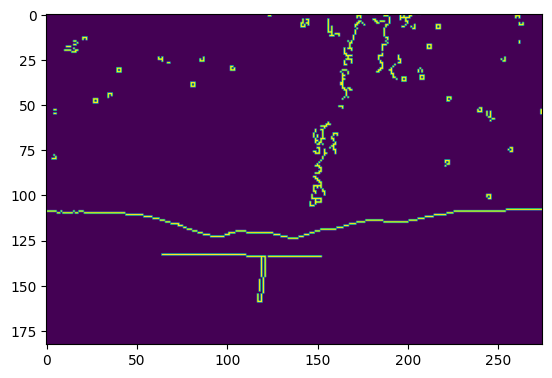

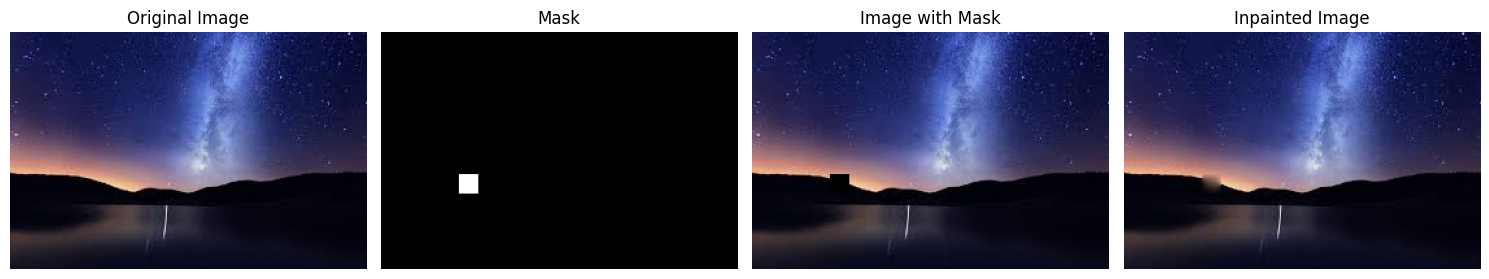

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
def detect_edges(image, low_threshold=100, high_threshold=200):
    """
    Détecte les contours dans l'image donnée en utilisant le détecteur de contours de Canny.

    Paramètres :

    image : Image d'entrée (tableau numpy).
    low_threshold : Seuil bas pour le détecteur de contours de Canny.
    high_threshold : Seuil élevé pour le détecteur de contours de Canny.
    Renvoie :

    edges : Contours détectés (image binaire, tableau numpy).
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)
    return edges

def inpaint_image_with_edges(image, mask, edges, kernel_size=3, num_iterations=10):
    """
    Effectue l'inpainting de l'image donnée en utilisant un algorithme basé sur la diffusion avec des fonctionnalités préservant les contours.

    Paramètres :

    image : Image d'entrée (tableau numpy).
    mask : Masque indiquant la région à inpainter (tableau numpy).
    edges : Contours détectés (image binaire, tableau numpy).
    kernel_size : Taille du noyau de diffusion (entier impair).
    num_iterations : Nombre d'itérations pour le processus d'inpainting.
    Renvoie :

    inpainted_image : Image inpainted (tableau numpy).
    """
    # Initialisation
    inpainted_image = image.copy()
    
    # définition du noyau (gaussien ou linéaire)
    # kernel = np.ones((kernel_size, kernel_size), np.float32)
    # kernel /= kernel.sum()
    kernel = np.array([
    [0.073235, 0.176765, 0.073235],
    [0.176765, 0.000000, 0.176765],
    [0.073235, 0.176765, 0.073235]
])

    # Appliquer la diffusion plusieurs fois
    for _ in range(num_iterations):
        # convolution dans la zone défini par le masque
        temp_image = cv2.filter2D(inpainted_image, -1, kernel)
        
        # Apply diffusion barriers
        for y in range(1, image.shape[0] - 1):
            for x in range(1, image.shape[1] - 1):
                if mask[y, x] > 0:
                    if edges[y, x] == 0:  # No edge at this pixel
                        inpainted_image[y, x] = temp_image[y, x]
                    else:
                        inpainted_image[y, x] = image[y, x]  # Preserve edge

    return inpainted_image
def inpaint_image(image, mask, kernel_size=3, num_iterations=10):
    # Initialisation
    inpainted_image = image.copy()
    
    # definition du noyau
    # kernel = np.ones((kernel_size, kernel_size), np.float32)
    # kernel /= kernel.sum()
    kernel = np.array([
    [0.073235, 0.176765, 0.073235],
    [0.176765, 0.000000, 0.176765],
    [0.073235, 0.176765, 0.073235]
])

    # Boucle de convolution
    for _ in range(num_iterations):
        # Convolve masked regions with the kernel
        temp_image = cv2.filter2D(inpainted_image, -1, kernel)
        inpainted_image[mask > 0] = temp_image[mask > 0]

    return inpainted_image

# chargement des image
image_path = 'data\paysage1.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
plt.imshow(image)
# On crée un masque carré manuellement
mask = np.zeros(image.shape[:2], dtype=np.uint8)
x, y, w, h = 60, 110, 15, 15
mask[y:y+h, x:x+w] = 255
mask_path = 'path_to_mask.png'
cv2.imwrite(mask_path, mask)

# Seuillage du masque
_, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

# Création d'un overlay pour apercevoir le masque sur l'image d'origine
overlay = image.copy()
overlay[mask > 0] = [0, 0, 0]  
edges = detect_edges(image)

# Algo
#inpainted_image = inpaint_image_with_edges(overlay, mask, edges,kernel_size=3, num_iterations=300)
inpainted_image = inpaint_image(overlay, mask,kernel_size=3, num_iterations=300)
plt.figure() 
plt.imshow(edges)
# Résultats
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Image with Mask')
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Inpainted Image')
plt.imshow(cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()
